In [96]:
import pandas as pd
import numpy as np
import psycopg2
import sqlalchemy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] =  [12, 12]
%matplotlib inline
from datetime import datetime, date


In [97]:
from datetime import datetime
def dateparse (time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs))
def unique(list1): 
    x = np.array(list1) 
    print(np.unique(x)) 
def label_action (row):
   if row['genres'].lower().find('action') != -1 :
      return 1
   else :
      return 0
def label_adventure (row):
   if row['genres'].lower().find('adventure') != -1 :
      return 1
   else :
      return 0
def label_animation (row):
   if row['genres'].lower().find('animation') != -1 :
      return 1
   else :
      return 0
def label_children (row):
   if row['genres'].lower().find('children') != -1 :
      return 1
   else :
      return 0
def label_comedy (row):
   if row['genres'].lower().find('comedy') != -1 :
      return 1
   else :
      return 0
def label_crime (row):
   if row['genres'].lower().find('crime') != -1 :
      return 1
   else :
      return 0
def label_documentary (row):
   if row['genres'].lower().find('documentary') != -1 :
      return 1
   else :
      return 0
def label_drama (row):
   if row['genres'].lower().find('drama') != -1 :
      return 1
   else :
      return 0
def label_fantasy (row):
   if row['genres'].lower().find('fantasy') != -1 :
      return 1
   else :
      return 0
def label_filmnoir (row):
   if row['genres'].lower().find('film-noir') != -1 :
      return 1
   else :
      return 0
def label_horror (row):
   if row['genres'].lower().find('horror') != -1 :
      return 1
   else :
      return 0
def label_imax (row):
   if row['genres'].lower().find('imax') != -1 :
      return 1
   else :
      return 0
def label_musical (row):
   if row['genres'].lower().find('musical') != -1 :
      return 1
   else :
      return 0
def label_mystery (row):
   if row['genres'].lower().find('mystery') != -1 :
      return 1
   else :
      return 0
def label_scifi (row):
   if row['genres'].lower().find('sci-fi') != -1 :
      return 1
   else :
      return 0
def label_western (row):
   if row['genres'].lower().find('western') != -1 :
      return 1
   else :
      return 0
def label_war (row):
   if row['genres'].lower().find('war') != -1 :
      return 1
   else :
      return 0
def label_thriller (row):
   if row['genres'].lower().find('thriller') != -1 :
      return 1
   else :
      return 0
def label_romance (row):
   if row['genres'].lower().find('romance') != -1 :
      return 1
   else :
      return 0

In [98]:
import psycopg2
from sqlalchemy import create_engine

conn = psycopg2.connect("host=localhost dbname=movie-data user=postgres password='postgres'")
cur = conn.cursor()

In [ ]:
#create table commands
cur.execute('CREATE TABLE movies("movieId" integer PRIMARY KEY,title varchar,year integer, action integer default 0,adventure integer default 0,animation integer default 0,children integer default 0,comedy integer default 0,crime integer default 0,documentary integer default 0,drama integer default 0,filmnoir integer default 0,fantasy integer default 0,horror integer default 0,imax integer default 0,musical integer default 0,romance integer default 0,mystery integer default 0,scifi integer default 0,thriller integer default 0,war integer default 0,western integer default 0)')
conn.commit()

cur.execute('CREATE TABLE rating("userId" integer,"movieId" integer REFERENCES movies("movieId"),rating real,"timestamp" timestamp, "year" integer,month varchar)')
conn.commit()

cur.execute('CREATE TABLE genometags("tagId" integer primary key,tag varchar)')
conn.commit()

cur.execute('CREATE TABLE genomescore("movieId" integer REFERENCES movies("movieId"),"tagId" integer,relevance real)')
conn.commit()

cur.execute('CREATE TABLE tags("userId" integer,"movieId" integer REFERENCES movies("movieId"),tag varchar,"timestamp" timestamp, "year" integer,month varchar)')
conn.commit()

In [46]:
#create normalised csv for movies table
moviestbl = pd.read_csv("C:\\Users\\nikita\\Documents\\MADS courses\\Data models\\Assignment1\\dataset_large/movies.csv")
moviestbl['year'] = moviestbl['title'].str.extract('.*\((\d+)\).*')
moviestbl['title'] = moviestbl['title'].str.extract('(.*) \(\d+\)')
uniqueGenres = moviestbl['genres'].str.cat(sep='|').lower()
uniqueGenres = uniqueGenres.split('|')
# unique(uniqueGenres)
moviestbl['action'] = moviestbl.apply (lambda row: label_action(row), axis=1)
moviestbl['adventure'] = moviestbl.apply (lambda row: label_adventure(row), axis=1)
moviestbl['adventure'] = moviestbl.apply (lambda row: label_adventure(row), axis=1)
moviestbl['animation'] = moviestbl.apply (lambda row: label_animation(row), axis=1)
moviestbl['children'] = moviestbl.apply (lambda row: label_children(row), axis=1)
moviestbl['comedy'] = moviestbl.apply (lambda row: label_comedy(row), axis=1)
moviestbl['crime'] = moviestbl.apply (lambda row: label_crime(row), axis=1)
moviestbl['documentary'] = moviestbl.apply (lambda row: label_documentary(row), axis=1)
moviestbl['drama'] = moviestbl.apply (lambda row: label_drama(row), axis=1)
moviestbl['fantasy'] = moviestbl.apply (lambda row: label_fantasy(row), axis=1)
moviestbl['filmnoir'] = moviestbl.apply (lambda row: label_filmnoir(row), axis=1)
moviestbl['horror'] = moviestbl.apply (lambda row: label_horror(row), axis=1)
moviestbl['imax'] = moviestbl.apply (lambda row: label_imax(row), axis=1)
moviestbl['musical'] = moviestbl.apply (lambda row: label_musical(row), axis=1)
moviestbl['mystery'] = moviestbl.apply (lambda row: label_mystery(row), axis=1)
moviestbl['romance'] = moviestbl.apply (lambda row: label_romance(row), axis=1)
moviestbl['thriller'] = moviestbl.apply (lambda row: label_thriller(row), axis=1)
moviestbl['war'] = moviestbl.apply (lambda row: label_war(row), axis=1)
moviestbl['western'] = moviestbl.apply (lambda row: label_western(row), axis=1)
moviestbl['scifi'] = moviestbl.apply (lambda row: label_scifi(row), axis=1)
moviestbl = moviestbl.drop(['genres'], axis=1)
moviestbl.to_csv (r'C:\\Users\\nikita\\Documents\\MADS courses\\Data models\\Assignment1\\dataset_large/Nmovies.csv', index = None, header=True)

,movieId,title,year,action,adventure,animation,children,comedy,crime,documentary,...,filmnoir,horror,imax,musical,mystery,romance,thriller,war,western,scifi
0,1,Toy Story,1995,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#copy csv to postgresql
with open("C:\\Users\\nikita\\Documents\\MADS courses\\Data models\\Assignment1\\dataset_large/Nmovies.csv", 'r') as f:
    next(f) # Skip the header row.
    cur.copy_from(f, 'movies', sep=',')
    conn.commit()

In [30]:
#create normalised csv for ratings
import calendar
ratingtbl = pd.read_csv("C:\\Users\\nikita\\Documents\\MADS courses\\Data models\\Assignment1\\dataset_large/ratings.csv")
ratingtbl['timestamp'] = pd.to_datetime(ratingtbl['timestamp'], unit='s')
ratingtbl['year'] = ratingtbl['timestamp'].dt.year #new column for year
ratingtbl['month'] = ratingtbl['timestamp'].dt.month #new column for month
ratingtbl['month'] = ratingtbl['month'].apply(lambda x: calendar.month_abbr[x])
ratingtbl.to_csv (r'C:\\Users\\nikita\\Documents\\MADS courses\\Data models\\Assignment1\\dataset_large/Nratings.csv', index = None, header=True)
# ratingtbl.head()

In [31]:
#copy csv to postgresql
with open("C:\\Users\\nikita\\Documents\\MADS courses\\Data models\\Assignment1\\dataset_large/Nratings.csv", 'r') as f:
    next(f) # Skip the header row.
    cur.copy_from(f, 'rating', sep=',')
    conn.commit()

In [34]:
with open("C:\\Users\\nikita\\Documents\\MADS courses\\Data models\\Assignment1\\dataset_large/genome-tags.csv", 'r') as f:
    next(f) # Skip the header row.
    cur.copy_from(f, 'genometags', sep=',')
    conn.commit()

In [40]:
#copy csv to postgresql
import calendar
tagstbl = pd.read_csv("C:\\Users\\nikita\\Documents\\MADS courses\\Data models\\Assignment1\\dataset_large/tags.csv")
tagstbl['timestamp'] = pd.to_datetime(tagstbl['timestamp'], unit='s')
tagstbl['year'] = tagstbl['timestamp'].dt.year #new column for year
tagstbl['month'] = tagstbl['timestamp'].dt.month #new column for month
tagstbl['month'] = tagstbl['month'].apply(lambda x: calendar.month_abbr[x])

In [41]:
#normalised csv file
tagstbl.to_csv (r'C:\\Users\\nikita\\Documents\\MADS courses\\Data models\\Assignment1\\dataset_large/Ntags.csv', index = None, header=True)

In [ ]:
with open("C:\\Users\\nikita\\Documents\\MADS courses\\Data models\\Assignment1\\dataset_large/Ntags.csv", 'r') as f:
    next(f) # Skip the header row.
    cur.copy_from(f, 'tags', sep=',')
    conn.commit()

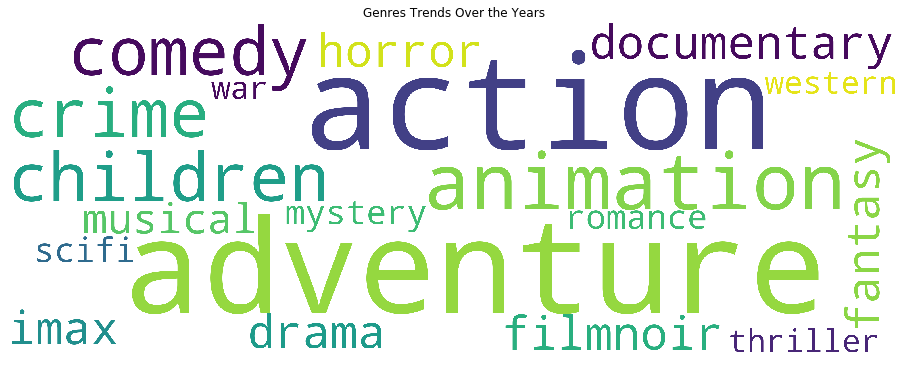

In [102]:
moviestbl = pd.read_csv("C:\\Users\\nikita\\Documents\\MADS courses\\Data models\\Assignment1\\dataset_large/movies.csv")
uniqueGenres = moviestbl['genres'].str.cat(sep='|').lower()
uniqueGenres = uniqueGenres.split('|')
uniqueGenres = np.array(uniqueGenres) 
uniqueGenres = np.unique(uniqueGenres)
uniqueGenres = np.delete(uniqueGenres, 0)

title_corpus = ' '.join(uniqueGenres).replace('-','')
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=1500, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.title("Genres Trends Over the Years")
plt.imshow(title_wordcloud)
plt.axis('off')
# plt.show()
plt.savefig("movietrendyears",dpi=500)

In [103]:
cur.execute('SELECT year,count(year) FROM movies where adventure = 1 group by year order by year asc')
aventure = cur.fetchall()
aventure_1 = [x[0] for x in aventure]
aventure_2 = [x[1] for x in aventure]

cur.execute('SELECT year,count(year) FROM movies where action = 1 group by year order by year asc')
action = cur.fetchall()
action_1 = [x[0] for x in action]
action_2 = [x[1] for x in action]

cur.execute('SELECT year,count(year) FROM movies where animation = 1 group by year order by year asc')
animation = cur.fetchall()
animation_1 = [x[0] for x in animation]
animation_2 = [x[1] for x in animation]

cur.execute('SELECT year,count(year) FROM movies where children = 1 group by year order by year asc')
children = cur.fetchall()
children_1 = [x[0] for x in children]
children_2 = [x[1] for x in children]

cur.execute('SELECT year,count(year) FROM movies where comedy = 1 group by year order by year asc')
comedy = cur.fetchall()
comedy_1 = [x[0] for x in comedy]
comedy_2 = [x[1] for x in comedy]

cur.execute('SELECT year,count(year) FROM movies where crime = 1 group by year order by year asc')
crime = cur.fetchall()
crime_1 = [x[0] for x in crime]
crime_2 = [x[1] for x in crime]

cur.execute('SELECT year,count(year) FROM movies where documentary = 1 group by year order by year asc')
documentary = cur.fetchall()
documentary_1 = [x[0] for x in documentary]
documentary_2 = [x[1] for x in documentary]

cur.execute('SELECT year,count(year) FROM movies where drama = 1 group by year order by year asc')
drama = cur.fetchall()
drama_1 = [x[0] for x in drama]
drama_2 = [x[1] for x in drama]

cur.execute('SELECT year,count(year) FROM movies where filmnoir = 1 group by year order by year asc')
filmnoir = cur.fetchall()
filmnoir_1 = [x[0] for x in filmnoir]
filmnoir_2 = [x[1] for x in filmnoir]

cur.execute('SELECT year,count(year) FROM movies where fantasy = 1 group by year order by year asc')
fantasy = cur.fetchall()
fantasy_1 = [x[0] for x in fantasy]
fantasy_2 = [x[1] for x in fantasy]

cur.execute('SELECT year,count(year) FROM movies where horror = 1 group by year order by year asc')
horror = cur.fetchall()
horror_1 = [x[0] for x in horror]
horror_2 = [x[1] for x in horror]

cur.execute('SELECT year,count(year) FROM movies where imax = 1 group by year order by year asc')
imax = cur.fetchall()
imax_1 = [x[0] for x in imax]
imax_2 = [x[1] for x in imax]

cur.execute('SELECT year,count(year) FROM movies where musical = 1 group by year order by year asc')
musical = cur.fetchall()
musical_1 = [x[0] for x in musical]
musical_2 = [x[1] for x in musical]

cur.execute('SELECT year,count(year) FROM movies where romance = 1 group by year order by year asc')
romance = cur.fetchall()
romance_1 = [x[0] for x in romance]
romance_2 = [x[1] for x in romance]

cur.execute('SELECT year,count(year) FROM movies where mystery = 1 group by year order by year asc')
mystery = cur.fetchall()
mystery_1 = [x[0] for x in mystery]
mystery_2 = [x[1] for x in mystery]

cur.execute('SELECT year,count(year) FROM movies where scifi = 1 group by year order by year asc')
scifi = cur.fetchall()
scifi_1 = [x[0] for x in scifi]
scifi_2 = [x[1] for x in scifi]

cur.execute('SELECT year,count(year) FROM movies where thriller = 1 group by year order by year asc')
thriller = cur.fetchall()
thriller_1 = [x[0] for x in thriller]
thriller_2 = [x[1] for x in thriller]

cur.execute('SELECT year,count(year) FROM movies where war = 1 group by year order by year asc')
war = cur.fetchall()
war_1 = [x[0] for x in war]
war_2 = [x[1] for x in war]

cur.execute('SELECT year,count(year) FROM movies where western = 1 group by year order by year asc')
western = cur.fetchall()
western_1 = [x[0] for x in western]
western_2 = [x[1] for x in western]


0.9643540382385254


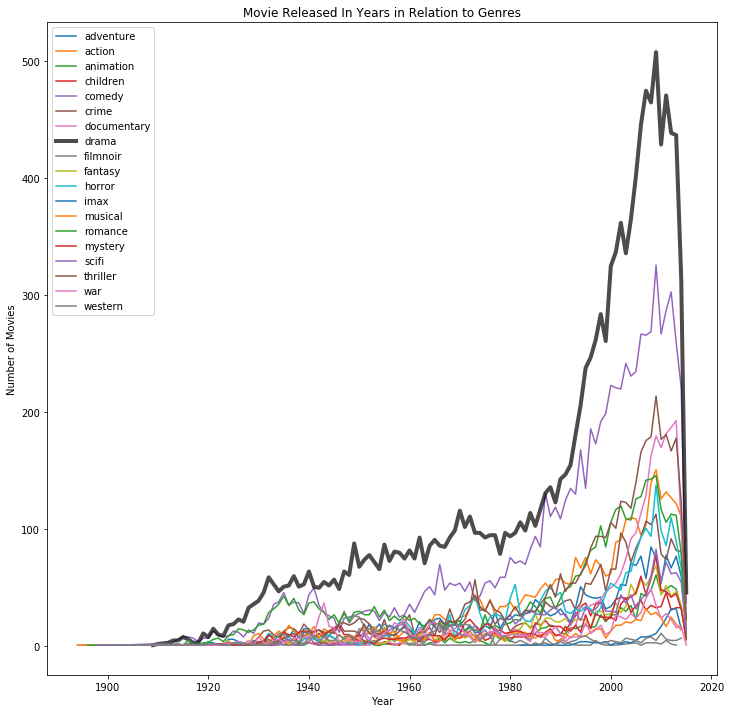

0.7735164165496826


In [104]:
plt.rcParams["figure.figsize"] =  [12, 12] #increase figure size

plt.plot(aventure_1,aventure_2, label = "adventure")
plt.plot(action_1, action_2, label = "action")
plt.plot(animation_1, animation_2, label = "animation")
plt.plot(children_1, children_2, label = "children")
plt.plot(comedy_1, comedy_2, label = "comedy")
plt.plot(crime_1, crime_2, label = "crime")
plt.plot(documentary_1, documentary_2, label = "documentary")
plt.plot(drama_1, drama_2, label = "drama",color='black', linewidth=4, alpha=0.7)
plt.plot(filmnoir_1, filmnoir_2, label = "filmnoir")
plt.plot(fantasy_1, fantasy_2, label = "fantasy")
plt.plot(horror_1, horror_2, label = "horror")
plt.plot(imax_1, imax_2, label = "imax")
plt.plot(musical_1, musical_2, label = "musical")
plt.plot(romance_1, romance_2, label = "romance")
plt.plot(mystery_1, mystery_2, label = "mystery")
plt.plot(scifi_1, scifi_2, label = "scifi")
plt.plot(thriller_1, thriller_2, label = "thriller")
plt.plot(war_1, war_2, label = "war")
plt.plot(western_1, western_2, label = "western")

plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movie Released In Years in Relation to Genres')
plt.legend()
plt.show()
# plt.savefig("movietrendgenres",dpi=500)

In [105]:
# cur.execute('SELECT movies.year,avg(rating.rating) FROM movies left join rating on movies."movieId" = rating."movieId" where adventure = 1 group by movies.year order by movies.year asc')
# adventure = cur.fetchall()
# adventure_1 = [x[0] for x in adventure]
# adventure_2 = [x[1] for x in adventure]

cur.execute('SELECT movies.year,avg(rating.rating) FROM movies left join rating on movies."movieId" = rating."movieId" where action = 1 group by movies.year order by movies.year asc')
action = cur.fetchall()
action_1 = [x[0] for x in action]
action_2 = [x[1] for x in action]

cur.execute('SELECT movies.year,avg(rating.rating) FROM movies left join rating on movies."movieId" = rating."movieId" where animation = 1 group by movies.year order by movies.year asc')
animation = cur.fetchall()
animation_1 = [x[0] for x in animation]
animation_2 = [x[1] for x in animation]

cur.execute('SELECT movies.year,avg(rating.rating) FROM movies left join rating on movies."movieId" = rating."movieId" where children = 1 group by movies.year order by movies.year asc')
children = cur.fetchall()
children_1 = [x[0] for x in children]
children_2 = [x[1] for x in children]

cur.execute('SELECT movies.year,avg(rating.rating) FROM movies left join rating on movies."movieId" = rating."movieId" where comedy = 1 group by movies.year order by movies.year asc')
comedy = cur.fetchall()
comedy_1 = [x[0] for x in comedy]
comedy_2 = [x[1] for x in comedy]

cur.execute('SELECT movies.year,avg(rating.rating) FROM movies left join rating on movies."movieId" = rating."movieId" where crime = 1 group by movies.year order by movies.year asc')
crime = cur.fetchall()
crime_1 = [x[0] for x in crime]
crime_2 = [x[1] for x in crime]

cur.execute('SELECT movies.year,avg(rating.rating) FROM movies left join rating on movies."movieId" = rating."movieId" where documentary = 1 group by movies.year order by movies.year asc')
documentary = cur.fetchall()
documentary_1 = [x[0] for x in documentary]
documentary_2 = [x[1] for x in documentary]

cur.execute('SELECT movies.year,avg(rating.rating) FROM movies left join rating on movies."movieId" = rating."movieId" where drama = 1 group by movies.year order by movies.year asc')
drama = cur.fetchall()
drama_1 = [x[0] for x in drama]
drama_2 = [x[1] for x in drama]

# cur.execute('SELECT movies.year,avg(rating.rating) FROM movies left join rating on movies."movieId" = rating."movieId" where filmnoir = 1 group by movies.year order by movies.year asc')
# filmnoir = cur.fetchall()
# filmnoir_1 = [x[0] for x in filmnoir]
# filmnoir_2 = [x[1] for x in filmnoir]

# cur.execute('SELECT movies.year,avg(rating.rating) FROM movies left join rating on movies."movieId" = rating."movieId" where fantasy = 1 group by movies.year order by movies.year asc')
# fantasy = cur.fetchall()
# fantasy_1 = [x[0] for x in fantasy]
# fantasy_2 = [x[1] for x in fantasy]

# cur.execute('SELECT movies.year,avg(rating.rating) FROM movies left join rating on movies."movieId" = rating."movieId" where horror = 1 group by movies.year order by movies.year asc')
# horror = cur.fetchall()
# horror_1 = [x[0] for x in horror]
# horror_2 = [x[1] for x in horror]

# cur.execute('SELECT movies.year,avg(rating.rating) FROM movies left join rating on movies."movieId" = rating."movieId" where imax = 1 group by movies.year order by movies.year asc')
# imax = cur.fetchall()
# imax_1 = [x[0] for x in imax]
# imax_2 = [x[1] for x in imax]

# cur.execute('SELECT movies.year,avg(rating.rating) FROM movies left join rating on movies."movieId" = rating."movieId" where musical = 1 group by movies.year order by movies.year asc')
# musical = cur.fetchall()
# musical_1 = [x[0] for x in musical]
# musical_2 = [x[1] for x in musical]

# cur.execute('SELECT movies.year,avg(rating.rating) FROM movies left join rating on movies."movieId" = rating."movieId" where romance = 1 group by movies.year order by movies.year asc')
# romance = cur.fetchall()
# romance_1 = [x[0] for x in romance]
# romance_2 = [x[1] for x in romance]

cur.execute('SELECT movies.year,avg(rating.rating) FROM movies left join rating on movies."movieId" = rating."movieId" where mystery = 1 group by movies.year order by movies.year asc')
mystery = cur.fetchall()
mystery_1 = [x[0] for x in mystery]
mystery_2 = [x[1] for x in mystery]

cur.execute('SELECT movies.year,avg(rating.rating) FROM movies left join rating on movies."movieId" = rating."movieId" where scifi = 1 group by movies.year order by movies.year asc')
scifi = cur.fetchall()
scifi_1 = [x[0] for x in scifi]
scifi_2 = [x[1] for x in scifi]

# cur.execute('SELECT movies.year,avg(rating.rating) FROM movies left join rating on movies."movieId" = rating."movieId" where thriller = 1 group by movies.year order by movies.year asc')
# thriller = cur.fetchall()
# thriller_1 = [x[0] for x in thriller]
# thriller_2 = [x[1] for x in thriller]

cur.execute('SELECT movies.year,avg(rating.rating) FROM movies left join rating on movies."movieId" = rating."movieId" where war = 1 group by movies.year order by movies.year asc')
war = cur.fetchall()
war_1 = [x[0] for x in war]
war_2 = [x[1] for x in war]

cur.execute('SELECT movies.year,avg(rating.rating) FROM movies left join rating on movies."movieId" = rating."movieId" where western = 1 group by movies.year order by movies.year asc')
western = cur.fetchall()
western_1 = [x[0] for x in western]
western_2 = [x[1] for x in western]

158.50767755508423


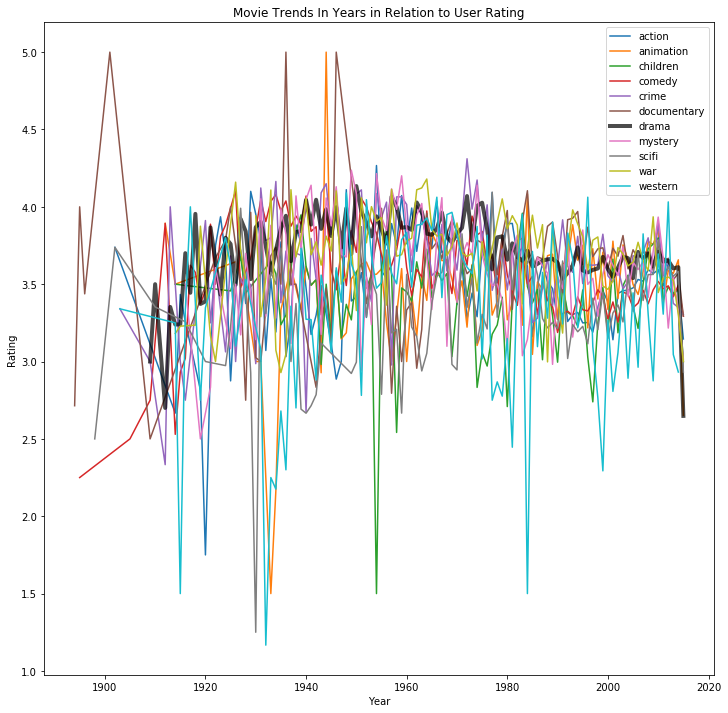

0.4459223747253418


In [106]:
# plt.plot(adventure_1,adventure_2, label = "adventure")
plt.rcParams["figure.figsize"] =  [12, 12]
plt.plot(action_1, action_2, label = "action")
plt.plot(animation_1, animation_2, label = "animation")
plt.plot(children_1, children_2, label = "children")
plt.plot(comedy_1, comedy_2, label = "comedy")
plt.plot(crime_1, crime_2, label = "crime")
plt.plot(documentary_1, documentary_2, label = "documentary")
plt.plot(drama_1, drama_2, label = "drama",color='black', linewidth=4, alpha=0.7)
# plt.plot(filmnoir_1, filmnoir_2, label = "filmnoir")
# plt.plot(fantasy_1, fantasy_2, label = "fantasy")
# plt.plot(horror_1, horror_2, label = "horror")
# plt.plot(imax_1, imax_2, label = "imax")
# plt.plot(musical_1, musical_2, label = "musical")
# plt.plot(romance_1, romance_2, label = "romance")
plt.plot(mystery_1, mystery_2, label = "mystery")
plt.plot(scifi_1, scifi_2, label = "scifi")
# plt.plot(thriller_1, thriller_2, label = "thriller")
plt.plot(war_1, war_2, label = "war")
plt.plot(western_1, western_2, label = "western")

plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Movie Trends In Years in Relation to User Rating')
plt.legend()
plt.show()
# plt.savefig("movietrend",dpi=500)

In [107]:
cur.execute('select count(*) filter (where year <= 2010) as period1,count(*) filter (where year >2010) as period2,rating from rating group by "rating"')
ratingvsyear = cur.fetchall()

5.141537666320801


In [67]:
ratingvsyearless = [x[0] for x in ratingvsyear] #first column
ratingvsyearmore = [x[1] for x in ratingvsyear] #second column
ratinglabels = [x[2] for x in ratingvsyear] #third column

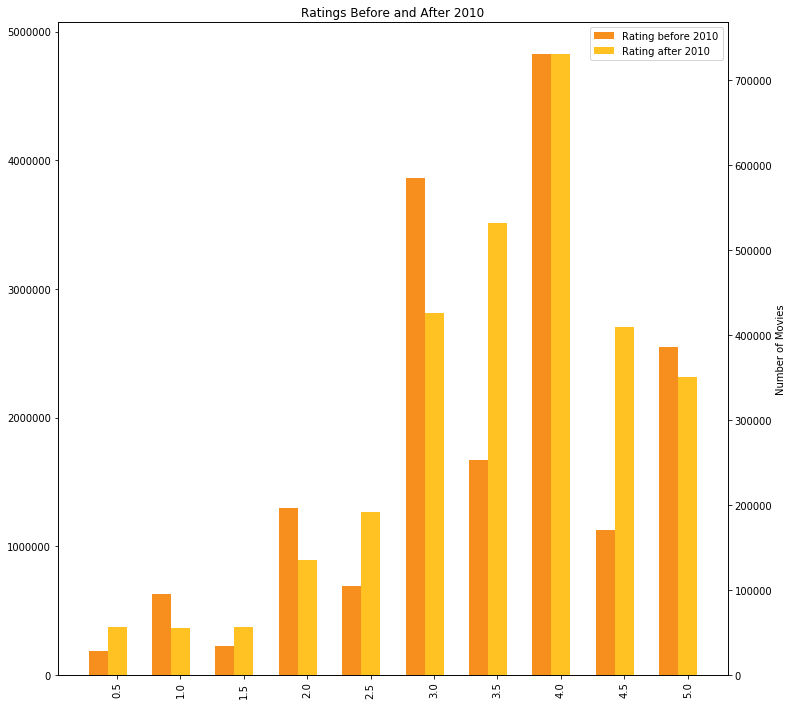

0.5739099979400635


In [108]:
x = np.arange(10)
ax1 = plt.subplot(1,1,1)
w = 0.3

plt.xticks(x + w, ratinglabels, rotation='vertical')
ratingnum =ax1.bar(x, ratingvsyearless, width=w, color='#F78F1E', align='center')
ax2 = ax1.twinx() # to use different bars on x axis
movienum =ax2.bar(x + w, ratingvsyearmore, width=w,color='#FFC222',align='center')

plt.ylabel('Number of Movies')
plt.xlabel('Rating')
plt.title('Ratings Before and After 2010')
plt.legend([ratingnum, movienum],['Rating before 2010', 'Rating after 2010'])
plt.show()
# plt.savefig("ratingbeforeafter",dpi=500)

In [109]:
ratingtbl = pd.read_csv("C:\\Users\\nikita\\Documents\\MADS courses\\Data models\\Assignment1\\dataset_large/Nratings.csv")
analyzeRatingYears = ratingtbl.groupby(['year'])['rating'].count().reset_index()

233.68401265144348


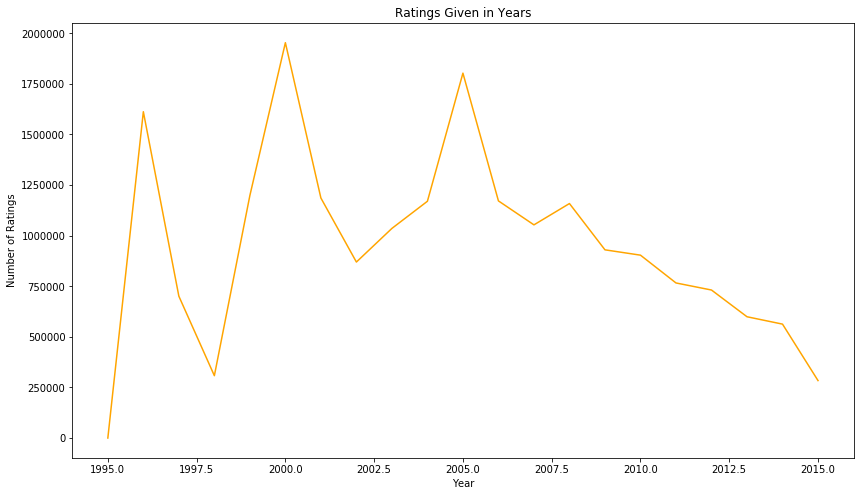

4.544229507446289


In [110]:
plt.rcParams["figure.figsize"] =  [14, 8]
plt.plot(analyzeRatingYears.year, analyzeRatingYears.rating, color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.title('Ratings Given in Years')
# xticks(np.arange(1995, 2015, step=2))
plt.show()
# plt.savefig("rating",dpi=500)

In [111]:
analyzeRating = ratingtbl.groupby(['rating','year'])['movieId'].count().reset_index()
year2000= analyzeRating[analyzeRating.year == 2000]
year2005 = analyzeRating[analyzeRating.year == 2005]
year2010 = analyzeRating[analyzeRating.year == 2010]
year2015= analyzeRating[analyzeRating.year == 2010]

12.837899684906006


5.483225345611572


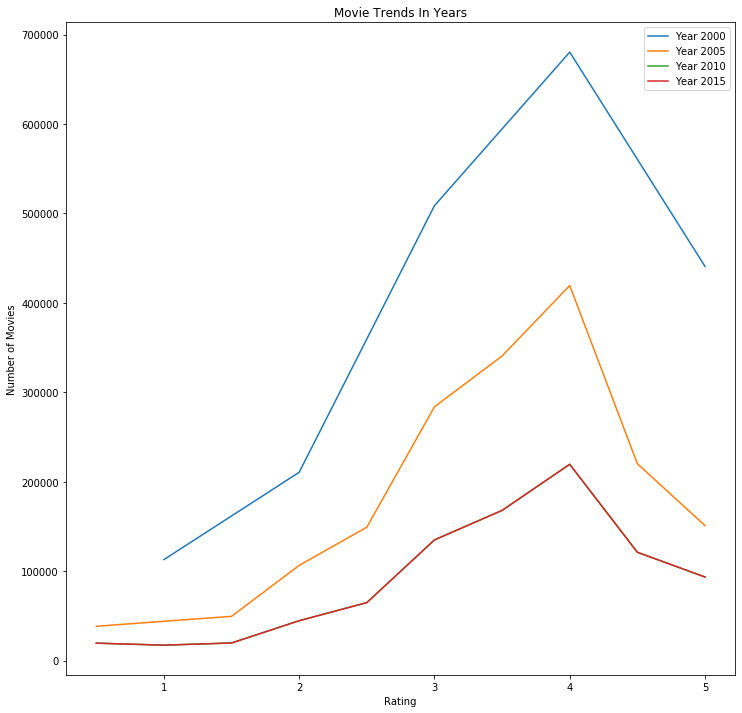

In [112]:
plt.rcParams["figure.figsize"] =  [12, 12]
plt.plot(year2000['rating'], year2000['movieId'], label = "Year 2000")
plt.plot(year2005['rating'], year2005['movieId'], label = "Year 2005")
plt.plot(year2010['rating'], year2010['movieId'], label = "Year 2010")
plt.plot(year2015['rating'], year2015['movieId'], label = "Year 2015")
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Movie Trends In Years')
plt.legend()
#plt.show()
plt.savefig("movietrend",dpi=500)

In [113]:
cur.execute('select movies.title,ct from movies join (select count("movieId") as ct,"movieId"  from rating group by "movieId") tblmovie on movies."movieId" = tblmovie."movieId" order by ct desc LIMIT 10')
topRatedMovies = cur.fetchall()

19.71942377090454


In [74]:
topRatedMoviesnames = [x[0] for x in topRatedMovies]
topRatedMoviesrating = [x[1] for x in topRatedMovies]

2.255136489868164


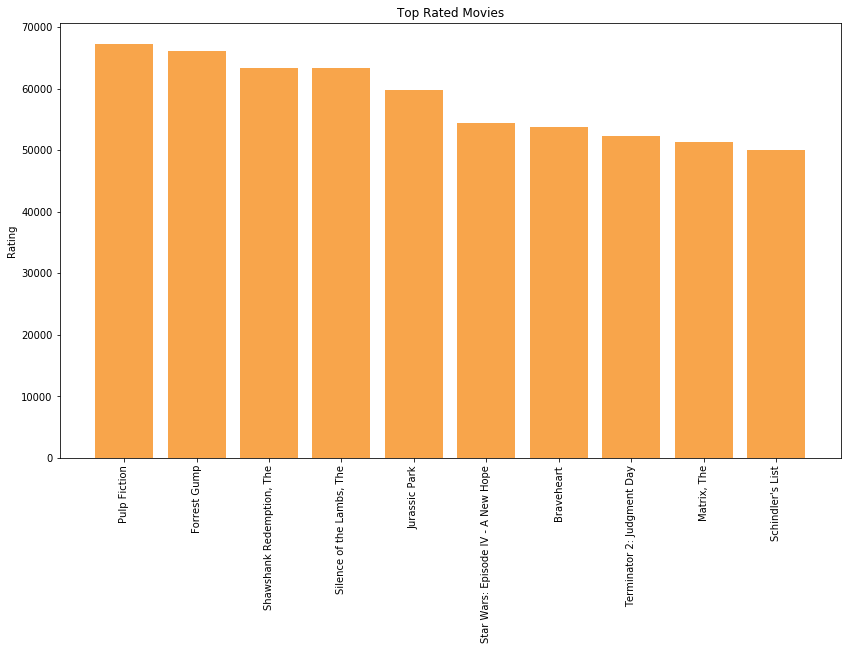

In [114]:
y_pos = np.arange(len(topRatedMoviesnames))
plt.rcParams["figure.figsize"] =  [14, 8]
plt.bar(y_pos, topRatedMoviesrating, align='center', alpha=0.8,color='#F78F1E')
plt.xticks(y_pos, topRatedMoviesnames,rotation='vertical')
plt.ylabel('Rating')
plt.title('Top Rated Movies')
# plt.show()
plt.savefig("TopRatedMovies",dpi=500)

In [115]:
movietbl = pd.read_csv("C:\\Users\\nikita\\Documents\\MADS courses\\Data models\\Assignment1\\dataset_large/movies.csv")
movietbl['year'] = movietbl['title'].str.extract('.*\((.*)\).*')
analyzeMovieReleased = movietbl.groupby(['year'])['movieId'].count()

1.2689416408538818


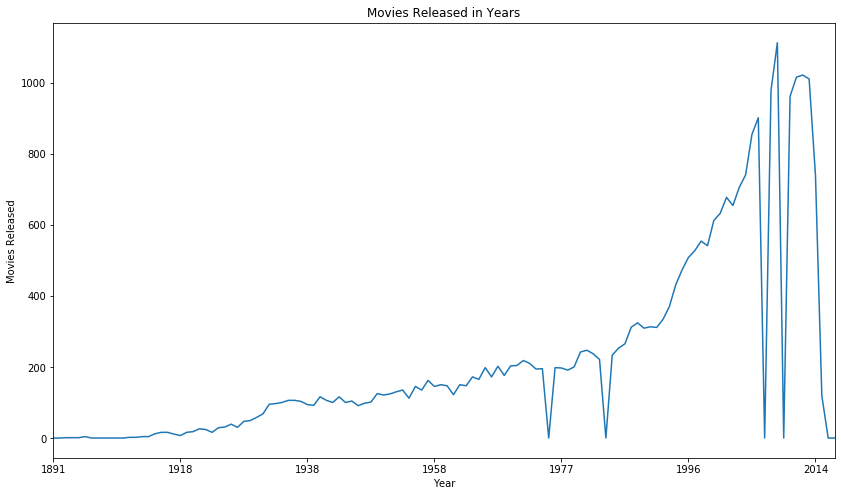

In [91]:
plt.rcParams["figure.figsize"] =  [14, 8]
analyzeMovieReleased.plot.line()
plt.xlabel('Year')
plt.ylabel('Movies Released')
plt.title('Movies Released in Years')
# plt.show()
plt.savefig("movierleeased",dpi=500)